OLS dataset ready: 538 rows | columns: ['Nikkei_USD', 'Corn', 'Brent_Crude', 'Natural_Gas', 'LNG_Asia', 'Copper', 'Internal_Index', 'External_Index']
--- ADF Test Results for: Nikkei_USD (LOG-RETURNS) ---
ADF Statistic: -24.6231
p-value: 0.0000
Result: STATIONARY
----------------------------------------
--- ADF Test Results for: Corn (LOG-RETURNS) ---
ADF Statistic: -6.5665
p-value: 0.0000
Result: STATIONARY
----------------------------------------
--- ADF Test Results for: Brent_Crude (LOG-RETURNS) ---
ADF Statistic: -11.3573
p-value: 0.0000
Result: STATIONARY
----------------------------------------
--- ADF Test Results for: Natural_Gas (LOG-RETURNS) ---
ADF Statistic: -27.0129
p-value: 0.0000
Result: STATIONARY
----------------------------------------
--- ADF Test Results for: LNG_Asia (LOG-RETURNS) ---
ADF Statistic: -23.9738
p-value: 0.0000
Result: STATIONARY
----------------------------------------
--- ADF Test Results for: Copper (LOG-RETURNS) ---
ADF Statistic: -10.8610
p-value

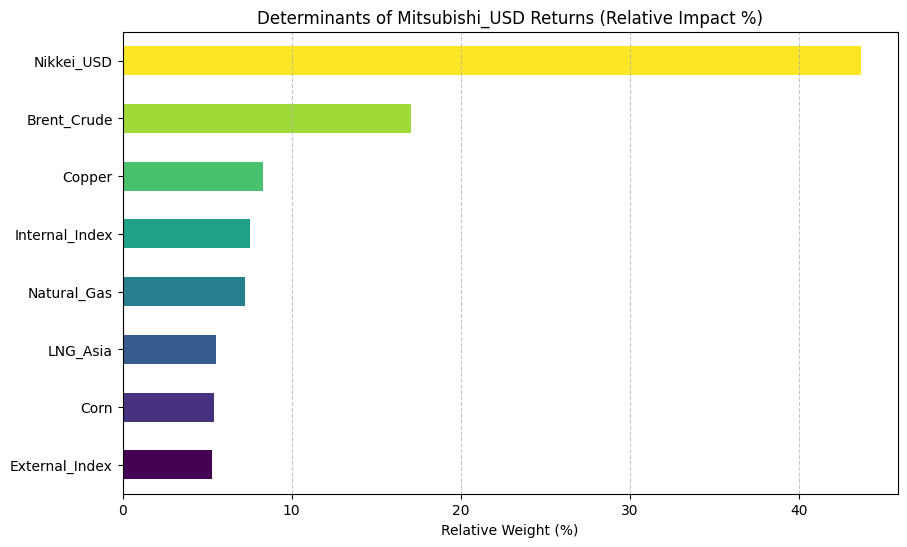

final_ols_ols_results.csv generated at: processed_data/final_ols/model_results/
Graph generated at: plots/final_ols
                            OLS Regression Results                            
Dep. Variable:         Mitsubishi_USD   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     44.10
Date:                Thu, 26 Feb 2026   Prob (F-statistic):           4.39e-54
Time:                        17:15:21   Log-Likelihood:                 1587.6
No. Observations:                 537   AIC:                            -3157.
Df Residuals:                     528   BIC:                            -3119.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
-----------

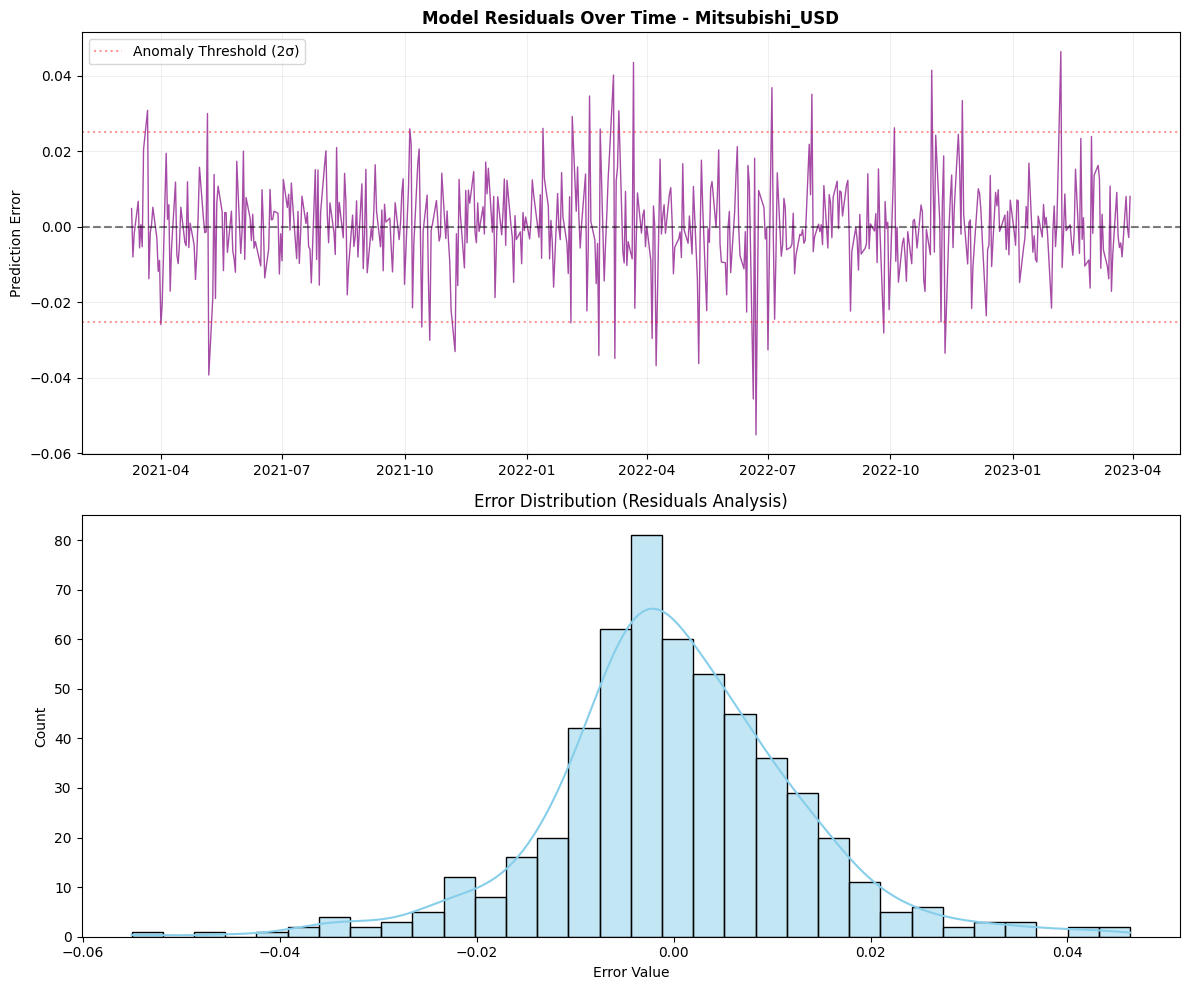


--- Outlier Detection: Largest Residuals for Mitsubishi_USD ---
Date
2022-06-22    0.055065
2023-02-06    0.046358
2022-06-20    0.045574
2022-03-22    0.043455
2022-11-01    0.041397
2022-03-07    0.040125
2021-05-07    0.039245
dtype: float64

--- Checking Granger Causality: Does             Nikkei_USD    Corn  Brent_Crude  Natural_Gas  LNG_Asia  Copper  \
Date                                                                         
2021-03-09  266.460484  547.50    68.239998        2.664     6.000  4.1035   
2021-03-10  267.428273  560.75    67.519997        2.662     6.000  4.0195   
2021-03-11  269.400554  550.25    67.900002        2.692     6.000  4.0420   
2021-03-12  273.758279  546.25    69.629997        2.668     6.010  4.1430   
2021-03-15  272.798662  562.00    69.220001        2.600     6.000  4.1455   
...                ...     ...          ...          ...       ...     ...   
2023-03-24  209.263354  632.75    75.910004        2.154    13.645  4.1460   
2023-03-27  20

In [ ]:
# MakroMetriks Insights · Victor Valle Solar
# github.com/vivaso86/MakroMetriks-Insights

import pandas as pd
import importlib
import src.analytics_engine as ana
import src.final_report as fin
import src.ols_pipeline as pipe
importlib.reload(fin)
importlib.reload(ana)

trends_ols_path = "processed_data/sentiment/final_ols"
ols_path = "processed_data/comm_analysis"

df_agro_ready = ana.prepare_market_data(f"{ols_path}/agro/agro_shifted_prices.csv")
df_metal_ready = ana.prepare_market_data(f"{ols_path}/metal/metal_shifted_prices.csv")
df_ener_ready = ana.prepare_market_data(f"{ols_path}/energy/energy_shifted_prices.csv")
data_fx_ready = ana.prepare_market_data(f"{ols_path}/tickers/dataset_tickers.csv")
data_trends_ready = ana.prepare_market_data(f"{trends_ols_path}/trends_ols_df.csv")

pipe.run_ols_pipeline(
    sector_name = "final_ols",
    data_fx_ready = data_fx_ready,
    df_agro_ready = df_agro_ready,
    df_ener_ready = df_ener_ready,
    df_metal_ready = df_metal_ready,
    data_trends_ready = data_trends_ready,
)

fin.generate_master_report(
    final_reports = ["final_ols", "all_commodities"],
    sector_names = ["METAL", "AGRO", "ENERGY"],
    trends_name = "events",
);